In [1]:
import importlib, os, gsw, gc, sys
sys.path.append(r'D:/Storage/Repositories/SeaExplorerTools')

import numpy as np
import matplotlib.pyplot as plt
import SXBQ as sx

In [2]:
missions = {'SEA055':[18,19,20,21,24],'SEA061':[38,39,40,41,42,43]}

time = np.array([],dtype='datetime64[ms]')
pres = np.array([])
temp = np.array([])
sal = np.array([])
chl = np.array([])
par = np.array([])

for k in missions.keys():
    for m in missions[k]:
        %reset_selective -f data out
        out = sx.load('D:/Storage/Dropbox/Jupyter/Data/Bornholm_'+k+'_M'+str(m)+'.pqt')
        data = out.data

        time = np.concatenate([time,data.Timestamp.values])
        pres = np.concatenate([pres,data.LEGATO_PRESSURE.values])
        temp = np.concatenate([temp,data.LEGATO_TEMPERATURE.values])
        sal = np.concatenate([sal,data.LEGATO_SALINITY.values])
        chl = np.concatenate([chl,data.FLBBPC_CHL_SCALED.values])
        par = np.concatenate([par,data.OCR504_Ed4.values])

data.info()
%reset_selective -f data

Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA055_M18.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA055_M19.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA055_M20.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA055_M21.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA055_M24.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA061_M38.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA061_M39.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA061_M40.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA061_M41.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA061_M42.pqt
Loaded D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA061_M43.pqt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374939 entries, 0 to 6374938
Data columns (total 45 columns):
 #   Column                Dtype              
---  ------                -----              
 0   AROD_FT_DO            float64            
 1   AROD_FT_TEMP          float64            
 2   A

In [3]:
xi = np.timedelta64(1,'D')
yi = np.arange(0,91,3)

In [4]:
TEMP, TIME, PRESSURE = sx.grid2d(time, pres, temp, xi=xi, yi=yi, fn='median')
SAL, _, _ = sx.grid2d(time, pres, sal, xi=xi, yi=yi, fn='median')
PAR, _, _ = sx.grid2d(time, pres, par, xi=xi, yi=yi, fn='max')
CHL, _, _ = sx.grid2d(time, pres, chl, xi=xi, yi=yi, fn='median')

<ipython-input-5-722fcb915d25>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(TIME,PRESSURE,TEMP)
<ipython-input-5-722fcb915d25>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(TIME,PRESSURE,SAL)
<ipython-input-5-722fcb915d25>:17: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(np.log(PAR),axis=0), np.nanmean(PRESSURE,axis=0))


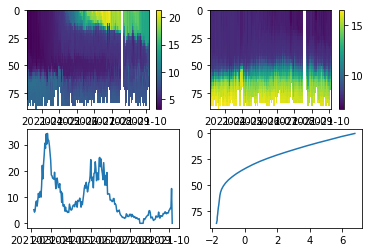

In [5]:
plt.figure()

plt.subplot(221)
plt.pcolor(TIME,PRESSURE,TEMP)
plt.colorbar()
plt.gca().invert_yaxis()

plt.subplot(222)
plt.pcolor(TIME,PRESSURE,SAL)
plt.colorbar()
plt.gca().invert_yaxis()

plt.subplot(223)
plt.plot(TIME[:,0], np.nansum(CHL,axis=1))

plt.subplot(224)
plt.plot(np.nanmean(np.log(PAR),axis=0), np.nanmean(PRESSURE,axis=0))
plt.gca().invert_yaxis()

In [8]:
np.savetxt("D:/Storage/Dropbox/Jupyter/MAR440/time.csv", TIME, delimiter=";")
np.savetxt("D:/Storage/Dropbox/Jupyter/MAR440/pressure.csv", PRESSURE, delimiter=";")
np.savetxt("D:/Storage/Dropbox/Jupyter/MAR440/temperature.csv", TEMP, delimiter=";")
np.savetxt("D:/Storage/Dropbox/Jupyter/MAR440/salinity.csv", SAL, delimiter=";")
np.savetxt("D:/Storage/Dropbox/Jupyter/MAR440/chlorophyll.csv", CHL, delimiter=";")
np.savetxt("D:/Storage/Dropbox/Jupyter/MAR440/par.csv", PAR, delimiter=";")
